In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


C:\Users\SABA\AppData\Local\Temp\ipykernel_20332\3313321725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data["DEATH_EVENT"],palette=cols)


[Text(0, 0, '203')]

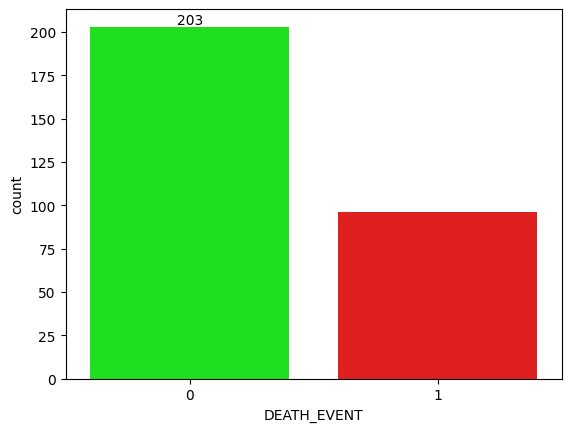

In [4]:
cols = ["#00FF00",'#FF0000']
ax = sns.countplot(x=data["DEATH_EVENT"],palette=cols)
ax.bar_label(ax.containers[0])

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


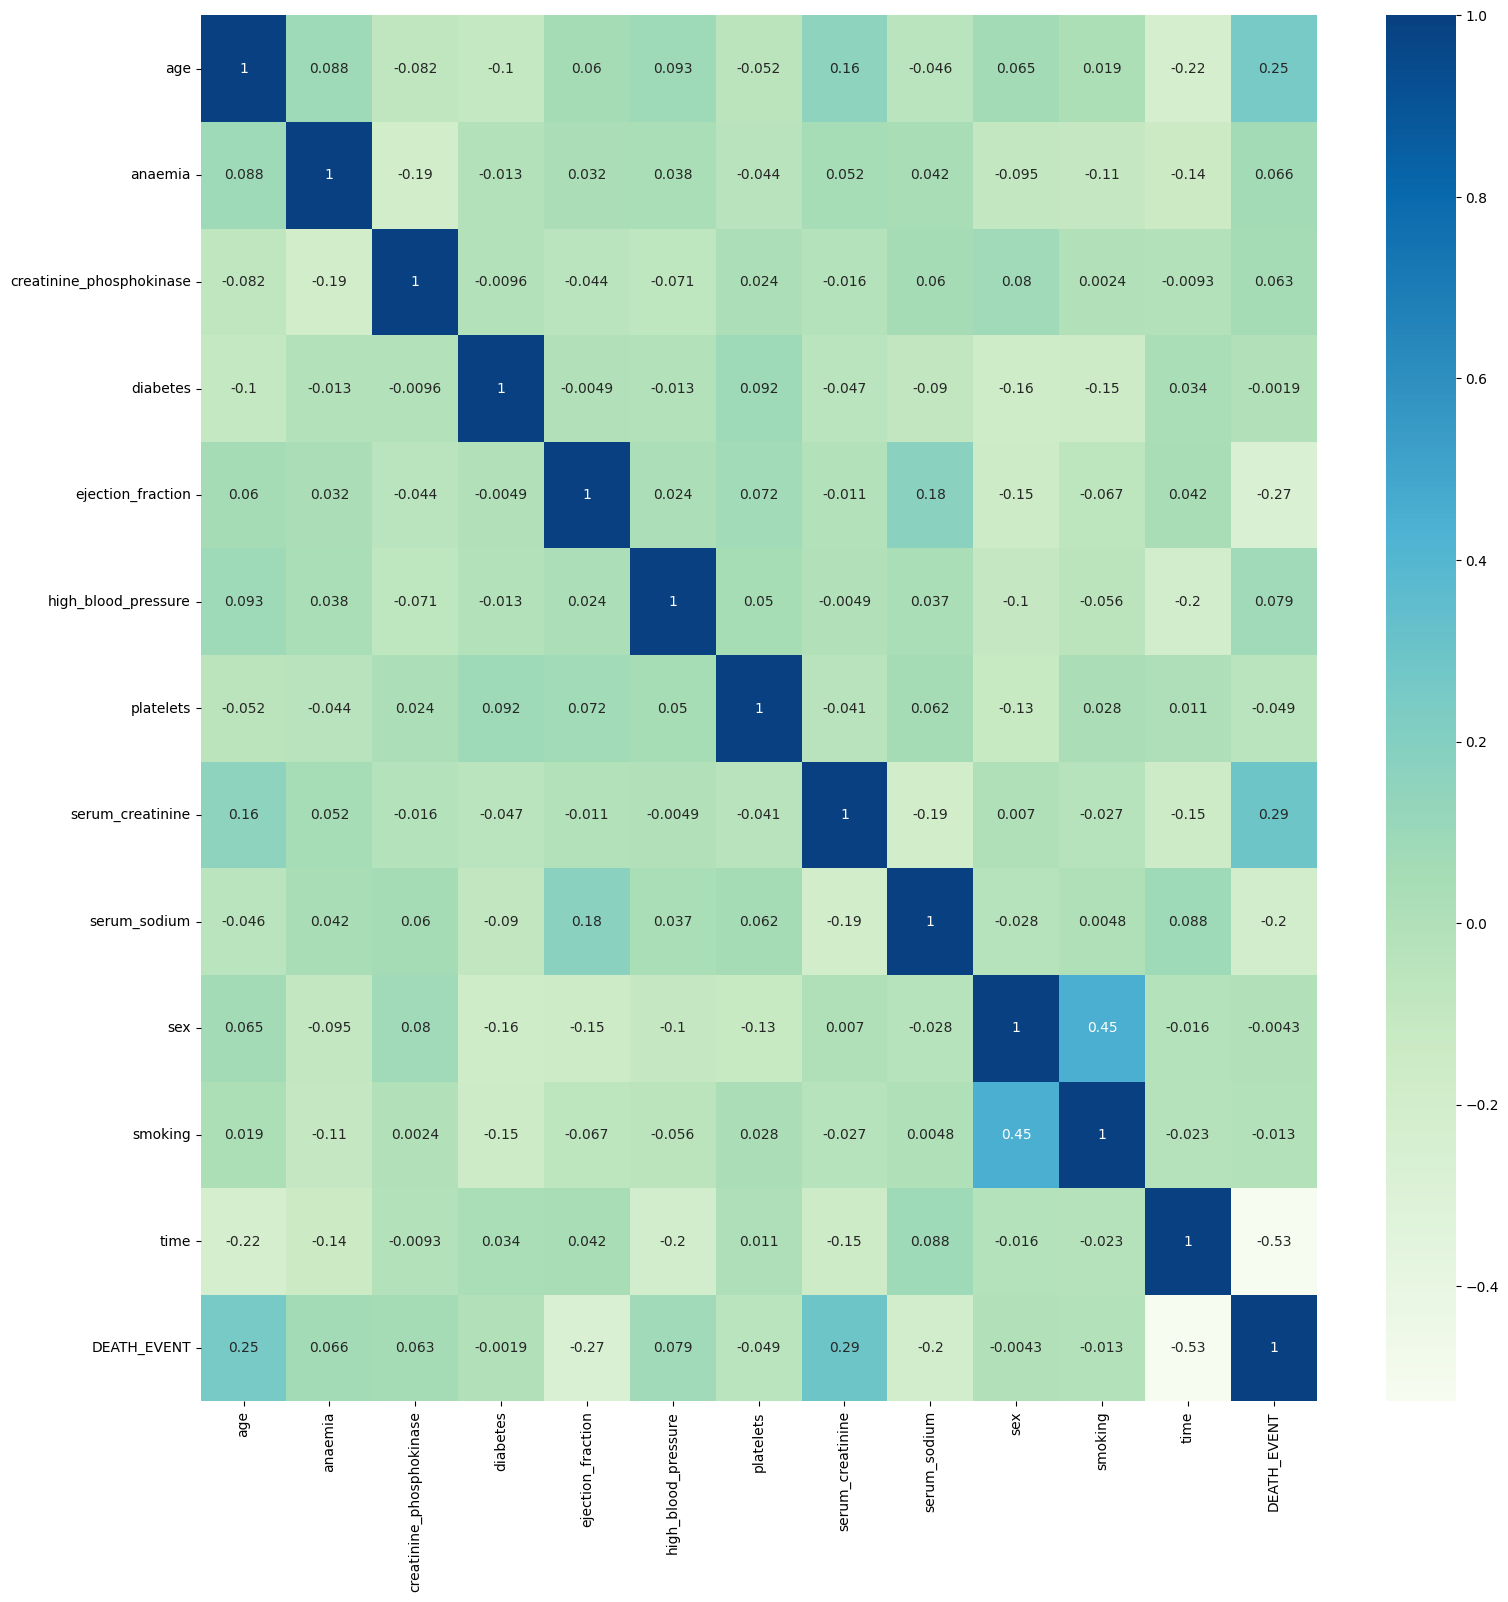

In [6]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot = True, cmap = "GnBu")
plt.show()

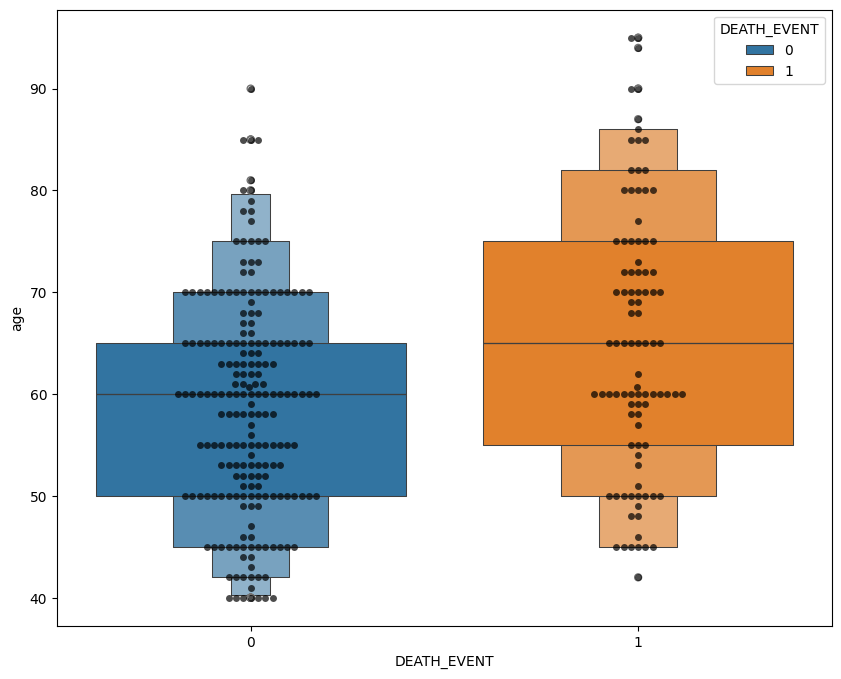

c:\Users\SABA\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


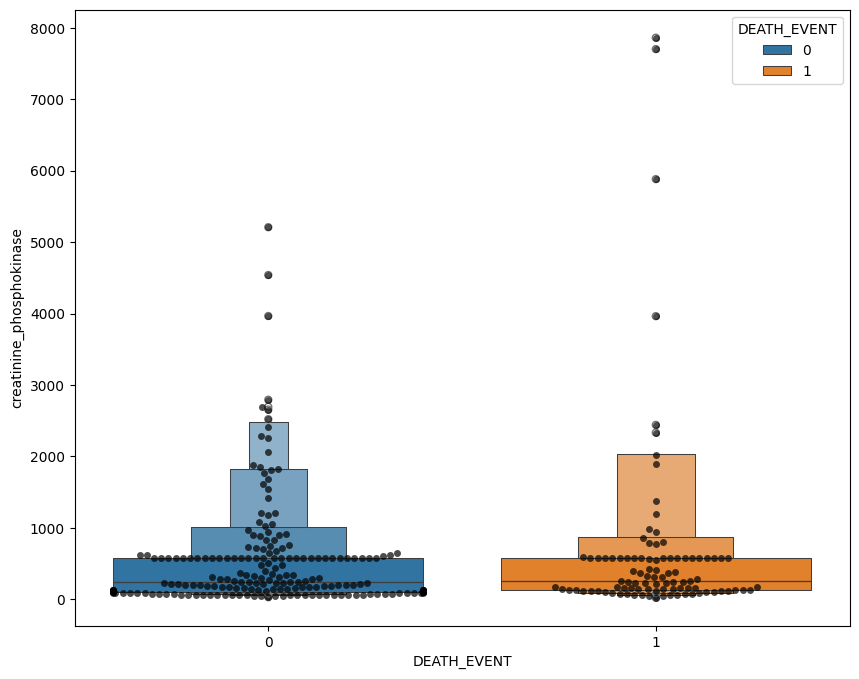

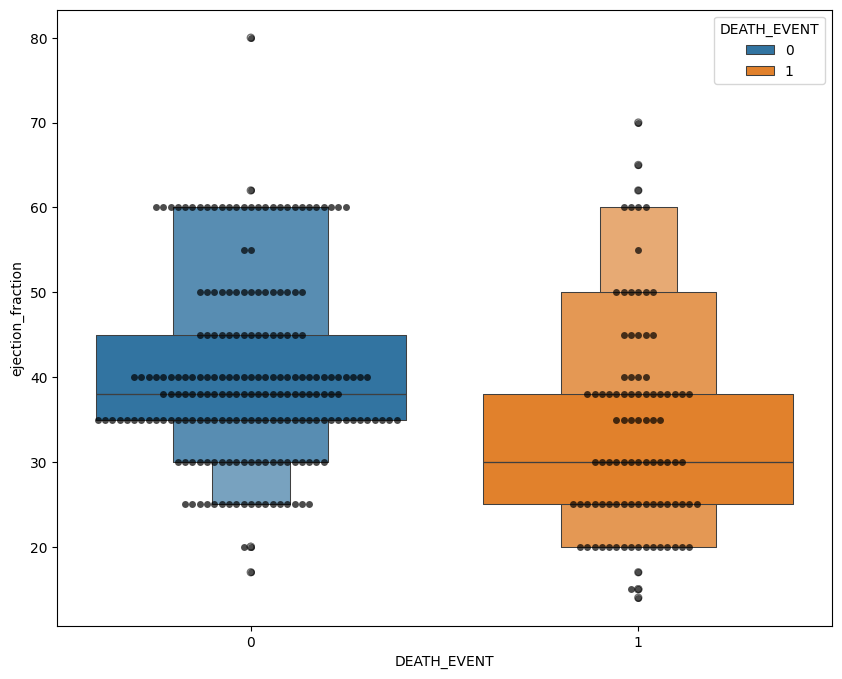

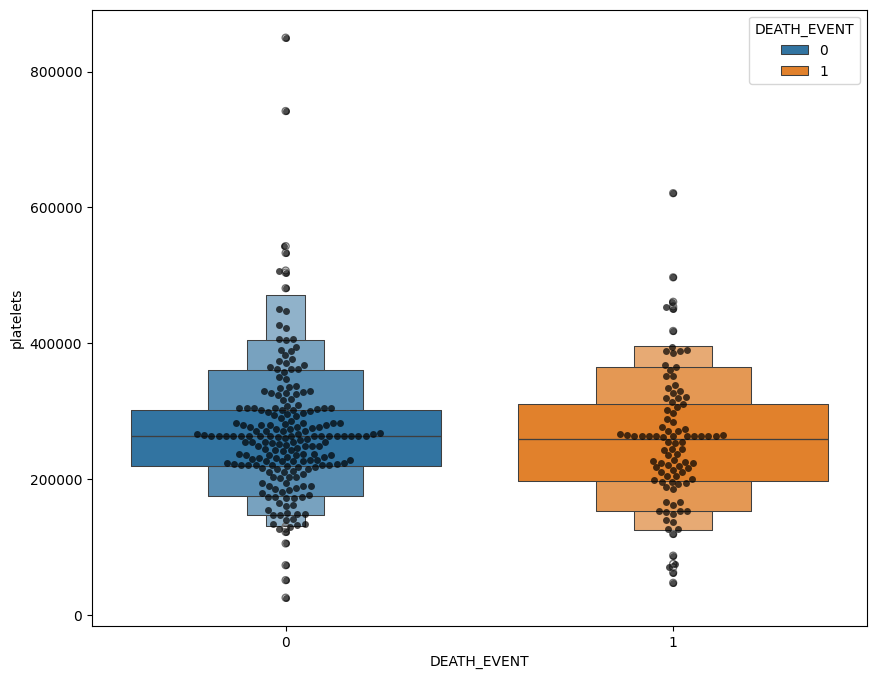

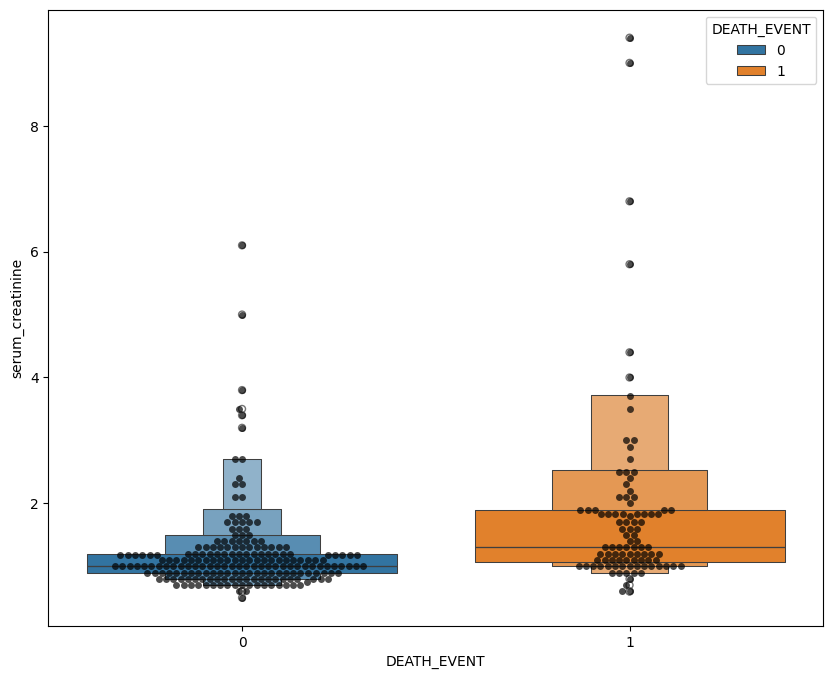

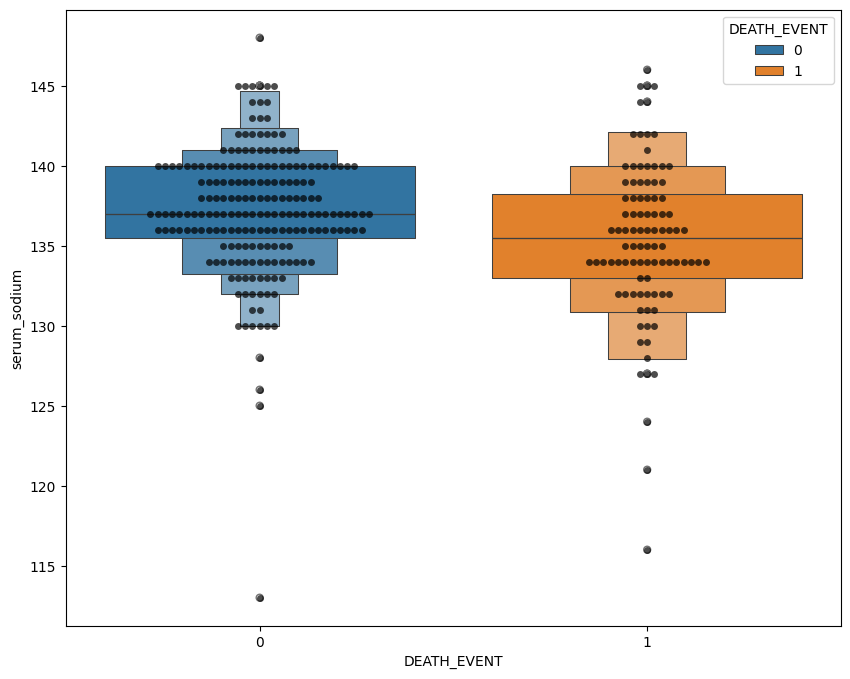

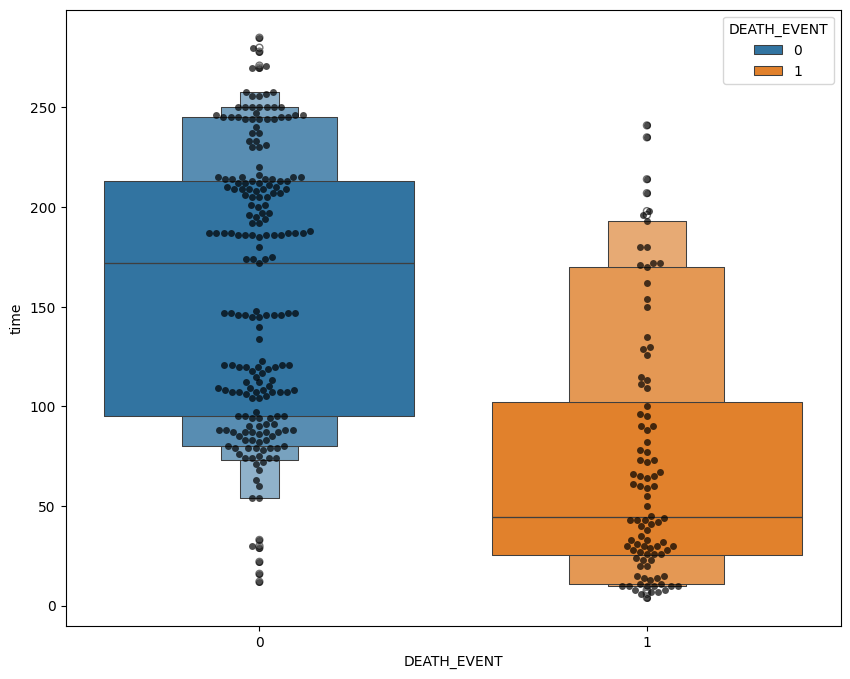

In [7]:
features = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for feature in features:
    plt.figure(figsize=(10,8))
    sns.swarmplot(x=data["DEATH_EVENT"],y=data[feature],alpha=0.7,color="black")
    sns.boxenplot(x=data["DEATH_EVENT"],y=data[feature],hue="DEATH_EVENT",data=data)
    plt.show()

In [8]:
X= data.drop(['DEATH_EVENT'],axis=1)
y= data["DEATH_EVENT"]
col_name = list(X.columns)
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_name)

In [9]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


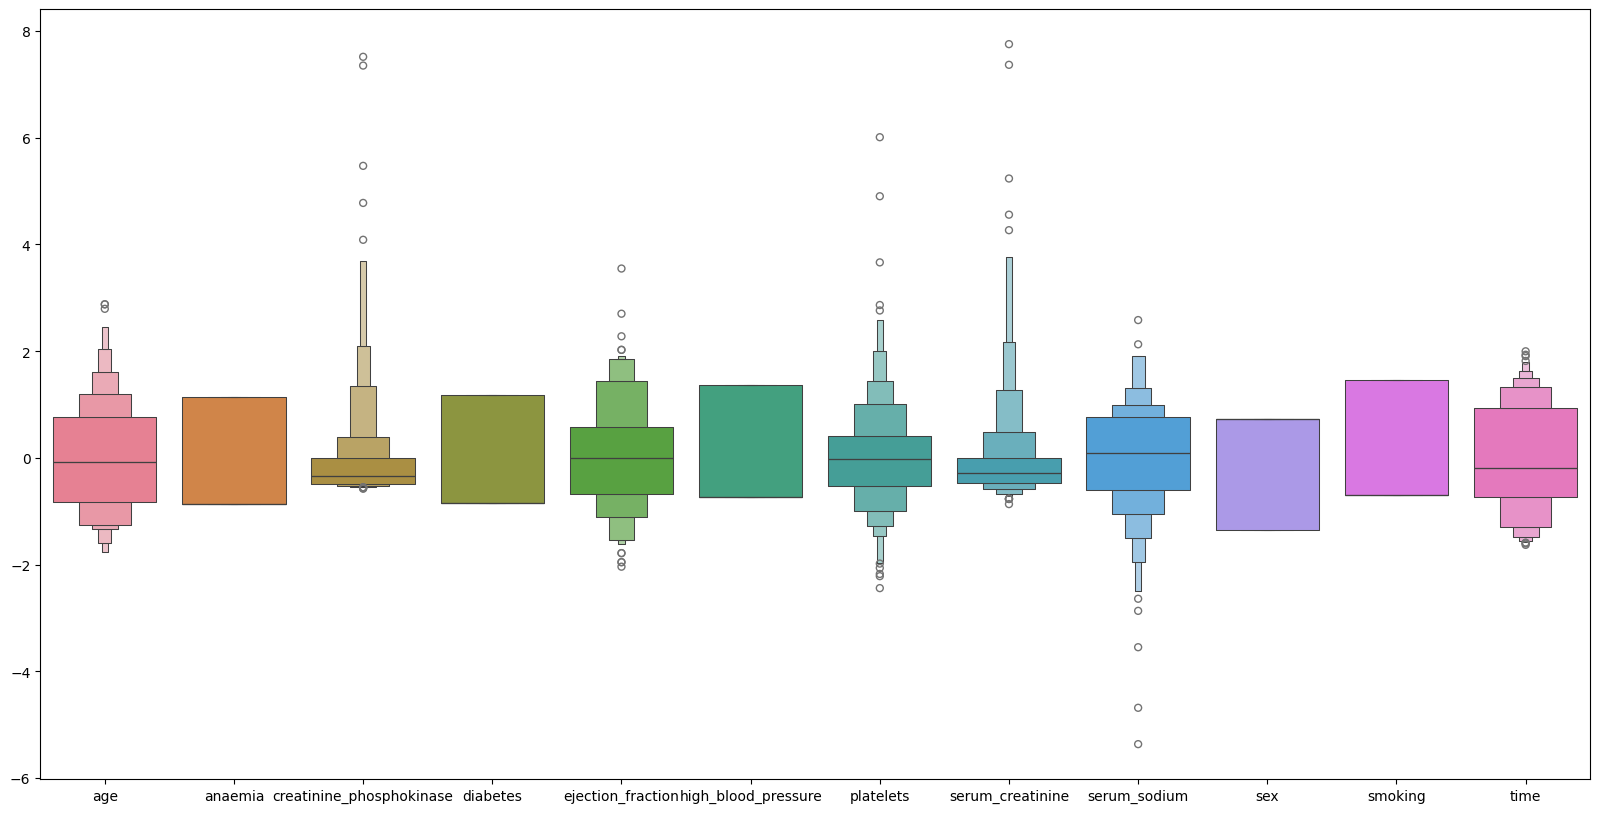

In [10]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=X_scaled)
plt.show()

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
Xs_train, Xs_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.3)

In [12]:
model1=SVC()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        59
           1       0.00      0.00      0.00        31

    accuracy                           0.66        90
   macro avg       0.33      0.50      0.40        90
weighted avg       0.43      0.66      0.52        90



c:\Users\SABA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SABA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SABA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [13]:
model2=SVC()
model2.fit(Xs_train,y_train)
ys_pred=model2.predict(Xs_test)
print(classification_report(y_test,ys_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        59
           1       0.77      0.65      0.70        31

    accuracy                           0.81        90
   macro avg       0.80      0.77      0.78        90
weighted avg       0.81      0.81      0.81        90



In [14]:
model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73        59
           1       0.43      0.29      0.35        31

    accuracy                           0.62        90
   macro avg       0.55      0.54      0.54        90
weighted avg       0.59      0.62      0.60        90



In [15]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(Xs_train,y_train)
ys_pred=model2.predict(Xs_test)
print(classification_report(y_test,ys_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        59
           1       0.82      0.45      0.58        31

    accuracy                           0.78        90
   macro avg       0.80      0.70      0.72        90
weighted avg       0.79      0.78      0.76        90



In [24]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, patience = 20,restore_best_weights = True
)
model = Sequential()
model.add(Dense(units=64, kernel_initializer = 'uniform', activation='relu',input_dim=12))
model.add(Dense(units=16, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(units=8, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer = 'uniform', activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

c:\Users\SABA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,089 (8.16 KB)

 Trainable params: 2,089 (8.16 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(Xs_train,y_train,batch_size=25,epochs=100, callbacks=[early_stopping], validation_split=0.25)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6474 - loss: 0.6928 - val_accuracy: 0.7170 - val_loss: 0.6915
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6945 - loss: 0.6915 - val_accuracy: 0.7170 - val_loss: 0.6900
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7131 - loss: 0.6898 - val_accuracy: 0.7170 - val_loss: 0.6885
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6510 - loss: 0.6895 - val_accuracy: 0.7170 - val_loss: 0.6870
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7012 - loss: 0.6872 - val_accuracy: 0.7170 - val_loss: 0.6853
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7092 - loss: 0.6856 - val_accuracy: 0.7170 - val_loss: 0.6837
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6575 - loss: 0.6863 - val_accuracy: 0.7170 - val_loss: 0.6819
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6960 - loss: 0.6831 - val_accuracy: 0.7170 - val_loss:

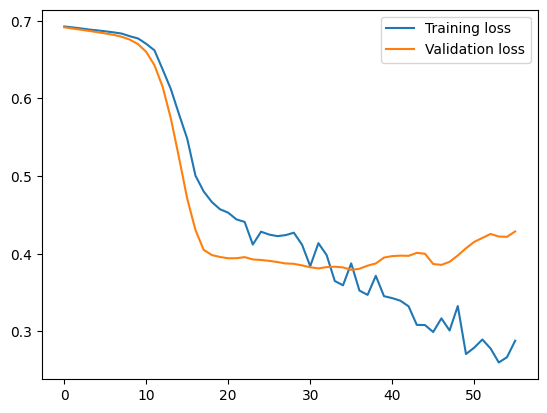

In [27]:
history_df=pd.DataFrame(history.history)

plt.plot(history_df.loc[:,['loss']], label = "Training loss")
plt.plot(history_df.loc[:, ['val_loss']], label= "Validation loss")
plt.legend()
plt.show()

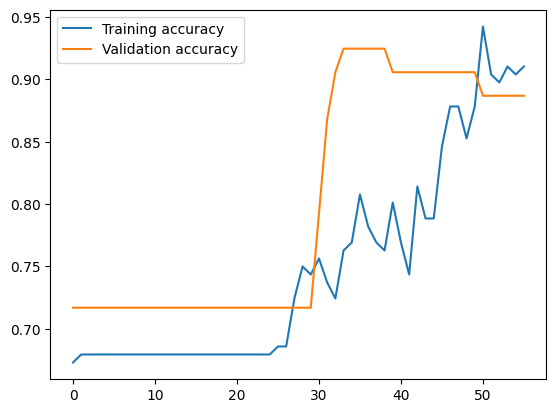

In [28]:
plt.plot(history_df.loc[:,['accuracy']], label = "Training accuracy")
plt.plot(history_df.loc[:, ['val_accuracy']], label= "Validation accuracy")
plt.legend()
plt.show()

In [29]:
y_pred = model.predict(Xs_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test,y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        59
           1       0.79      0.71      0.75        31

    accuracy                           0.83        90
   macro avg       0.82      0.80      0.81        90
weighted avg       0.83      0.83      0.83        90

